# VGG-16

In [11]:
# from VGG_16 import VGG_16
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [12]:
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 1


In [13]:
import tensorflow as tf


def block(x, n_convs, filters, kernel_size, activation, pool_size, pool_stride, block_name):
    for i in range(n_convs):
        x = tf.keras.layers.Conv2D(
            filters=filters,
            kernel_size=kernel_size,
            activation=activation,
            padding="same",
            name=f"{block_name}_conv_{i + 1}",
        )(x)

    x = tf.keras.layers.MaxPooling2D(
        pool_size=pool_size, strides=pool_stride, name=f"{block_name}_pool_{i + 1}"
    )(x)

    return x


def VGG_16_conv(image_input):
    # Conv_1
    x = block(
        image_input,
        n_convs=2,
        filters=64,
        kernel_size=(3, 3),
        activation="relu",
        pool_size=(2, 2),
        pool_stride=(2, 2),
        block_name="block1",
    )
    p1 = x

    # Conv_2
    x = block(
        x,
        n_convs=2,
        filters=128,
        kernel_size=(3, 3),
        activation="relu",
        pool_size=(2, 2),
        pool_stride=(2, 2),
        block_name="block2",
    )
    p2 = x

    # Conv_3
    x = block(
        x,
        n_convs=3,
        filters=256,
        kernel_size=(3, 3),
        activation="relu",
        pool_size=(2, 2),
        pool_stride=(2, 2),
        block_name="block3",
    )
    p3 = x

    # Conv_4
    x = block(
        x,
        n_convs=3,
        filters=512,
        kernel_size=(3, 3),
        activation="relu",
        pool_size=(2, 2),
        pool_stride=(2, 2),
        block_name="block4",
    )
    p4 = x

    # Conv_5
    x = block(
        x,
        n_convs=3,
        filters=512,
        kernel_size=(3, 3),
        activation="relu",
        pool_size=(2, 2),
        pool_stride=(2, 2),
        block_name="block5",
    )
    p5 = x

    return p1, p2, p3, p4, p5


def VGG_16_fcn(x, n_class):
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(4096, activation="relu", name="fc1")(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(4096, activation="relu", name="fc2")(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(n_class, activation="softmax", name="prediction")(x)

    return x


def VGG_16(x, n_class):
    _, _, _, _, x = VGG_16_conv(x)
    x = VGG_16_fcn(x, n_class)

    return x

## Load CIFAR-10 Dataset

In [14]:
# Load CIFAT-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normallize images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


## Build and compile the model

In [15]:
# Define inputs and outputs
n_classes = 10
input_shape = (32, 32, 3)
inputs = tf.keras.Input(shape=input_shape)
outputs = VGG_16(inputs, n_classes)

# Build VGG-16 model
model = tf.keras.Model(inputs, outputs, name="VGG16_CIFAR10")

# Compile
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

## Model Summary

In [16]:
model.summary()

Model: "VGG16_CIFAR10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv_1 (Conv2D)          │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv_2 (Conv2D)          │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool_2 (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv_1 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv_2 (Conv2D)          │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool_2 (MaxPooling2D)    │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv_1 (Conv2D)          │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv_2 (Conv2D)          │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv_3 (Conv2D)          │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool_3 (MaxPooling2D)    │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv_1 (Conv2D)          │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv_2 (Conv2D)          │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv_3 (Conv2D)          │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool_3 (MaxPooling2D)    │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv_1 (Conv2D)          │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv_2 (Conv2D)          │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv_3 (Conv2D)          │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool_3 (MaxPooling2D)    │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prediction (Dense)              │ (None, 10)             │        40,97

 Total params: 33,638,218 (128.32 MB)

 Trainable params: 33,638,218 (128.32 MB)

 Non-trainable params: 0 (0.00 B)


## Train the model

In [17]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.1820 - loss: 2.0624 - val_accuracy: 0.3642 - val_loss: 1.6633
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.4021 - loss: 1.5446 - val_accuracy: 0.5092 - val_loss: 1.3633
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5581 - loss: 1.2145 - val_accuracy: 0.6173 - val_loss: 1.0679
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6606 - loss: 0.9500 - val_accuracy: 0.6885 - val_loss: 0.8814
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7288 - loss: 0.7706 - val_accuracy: 0.6877 - val_loss: 0.9371
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7732 - loss: 0.6538 - val_accuracy: 0.7267 - val_loss: 0.8372
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8259 - loss: 0.5150 - val_accuracy: 0.7283 - val_loss: 0.8500
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8600 - loss: 0.4069 - 


## Evaluate the model

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_loss, test_acc)

313/313 - 2s - 6ms/step - accuracy: 0.7758 - loss: 1.5342
1.5342159271240234 0.7757999897003174


## Plot Learning Curves

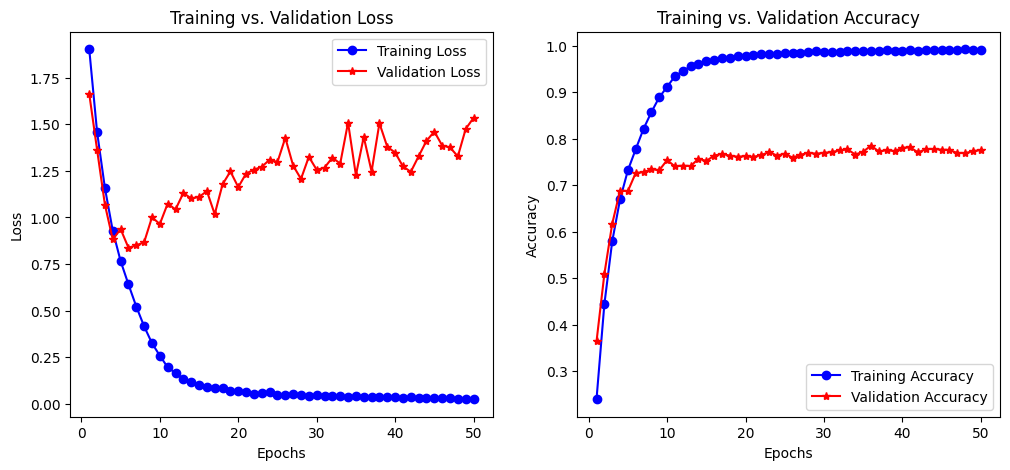

In [19]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.show()